# Fetal Health Classification

A **redução da mortalidade infantil** está refletida em vários **Objetivos de Desenvolvimento Sustentável das Nações Unidas** e é um indicador-chave do progresso humano. A ONU espera que, até 2030, os países acabem com as mortes evitáveis de recém-nascidos e crianças menores de 5 anos, com todos os países visando reduzir a mortalidade abaixo dos 5 anos para pelo menos 25 por 1.000 nascidos vivos.

Paralelamente à noção de mortalidade infantil, está a mortalidade materna, que representa 295.000 mortes durante e após a gravidez e o parto (em 2017). A grande maioria dessas mortes (94%) ocorreu em locais com poucos recursos, e a maioria poderia ter sido evitada.

Tendo em vista o que foi mencionado acima, os Cardiotocogramas (CTGs) são uma opção simples e acessível em termos de custos para avaliar a saúde fetal, permitindo que os profissionais de saúde tomem medidas para prevenir a mortalidade infantil e materna. O equipamento em si funciona enviando pulsos de ultrassom e lendo sua resposta, lançando luz sobre a frequência cardíaca fetal (FCF), movimentos fetais, contrações uterinas e muito mais.

<p align = "center">
<img src="Arquivos/fetal.jpg" width=80%>
</p>

O **objetivo** desse projeto é **criar um modelo de classificação** utilizando **análises de dados** e algoritmos de aprendizado de máquina automatizados (**Auto-ML**). Com esse modelo, espera-se que profissionais de saúde possam tomar decisões informadas sobre o bem-estar fetal e identificar possíveis complicações durante a gravidez e o parto, contribuindo assim para a redução da mortalidade materna e infantil.

## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados no [Kaggle](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification). O conjunto de dados "Fetal Health Classification" contém características extraídas de exames de Cardiotocograma, que foram classificados por três obstetras especialistas.

In [161]:
# Importação de bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importação de bibliotecas para visualização de resultados
import scikitplot as skplt

# importando os pacotes necessários
from pycaret.classification import setup, compare_models, models, create_model, predict_model
from pycaret.classification import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.classification import save_model, load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [162]:
# importar os dados
DATA_PATH = "Arquivos\\fetal_health.csv"
df = pd.read_csv(DATA_PATH)

## Análise dos Dados

Esta etapa tem por objetivo permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `baseline value` (valor de base): Valor médio da frequência cardíaca fetal (FCF) durante o exame.
* `accelerations` (acelerações): Número de acelerações do coração fetal por segundo.
* `fetal_movement` (movimento fetal): Número de movimentos fetais por segundo.
* `uterine_contractions`(contrações uterinas): Número de contrações uterinas por segundo.
* `light_decelerations` (desacelerações leves): Número de desacelerações leves do coração fetal por segundo.
* `severe_decelerations` (desacelerações severas): Número de desacelerações severas do coração fetal por segundo.
* `prolongued_decelerations` (desacelerações prolongadas): Número de desacelerações prolongadas do coração fetal por segundo.
* `abnormal_short_term_variability` (variabilidade anormal de curto prazo): Porcentagem de tempo com variabilidade anormal de curto prazo da FCF.
* `mean_value_of_short_term_variability` (valor médio da variabilidade de curto prazo): Valor médio da variabilidade de curto prazo da FCF.
* `percentage_of_time_with_abnormal_long_term_variability` (porcentagem de tempo com variabilidade anormal de longo prazo): Porcentagem de tempo com variabilidade anormal de longo prazo da FCF.
* `mean_value_of_long_term_variability` (valor médio da variabilidade de longo prazo): Valor médio da variabilidade de longo prazo da FCF.
* `histogram_width` (largura do histograma): Largura do histograma da FCF.
* `histogram_min` (mínimo do histograma): Valor mínimo do histograma da FCF.
* `histogram_max` (máximo do histograma): Valor máximo do histograma da FCF.
* `histogram_number_of_peaks` (número de picos do histograma): Número de picos no histograma da FCF.
* `histogram_number_of_zeroes` (número de zeros do histograma): Número de zeros no histograma da FCF.
* `histogram_mode` (modo do histograma): Modo do histograma da FCF.
* `histogram_mean` (média do histograma): Média do histograma da FCF.
* `histogram_median` (mediana do histograma): Mediana do histograma da FCF.
* `histogram_variance` (variância do histograma): Variância do histograma da FCF.
* `histogram_tendency` (tendência do histograma): Tendência do histograma da FCF.
* `fetal_health` (saúde fetal): Estado de saúde fetal, classificado em 3 categorias (1 - Normal, 2 - Suspeito, 3 - Patológico).

## Análise Exploratória dos Dados

Na análise exploratória de dados será efetuada uma explanação inicial das variáveis contidas na dataset, e entenderemos dados referentes a:

* *Contexto geral das variáveis*
* *Porcentagem de itens nulos*
* *Análise das variáveis separadas por seus respectivos grupos*
* *Divisão do conjunto de treino e teste*
* *Auto-ML*
* *Previsão em dados novos*


Primeiramente, observaremos como estão dispostas as cinco primeiras entradas do dataset para ter uma visão ampla da estrutura de dados.

In [163]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [164]:
# Visualizar o tamanho do dataframe
print("Entradas: ", df.shape[0])
print("Variáveis: ", df.shape[1])

Entradas:  2126
Variáveis:  22


O dataset possui 2126 linhas e 22 variáveis. Abaixo, extrairei as colunas referentes e o tipo das variáveis.

In [165]:
# Extrair o nome das colunas
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [166]:
# Extrair o tipo das variáveis
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

Como foi possível notar na visualização das primeiras linhas do dataset, todos os valores são numéricos e estão em float64. O dataset já está com um bom pré-processamento de dados, haja vista que mesmo as variáveis categórias já foram discretizadas. Observarei agora a porcentagem de itens nulos.

In [167]:
# porcentagem de itens nulo
(df.isnull().sum()/df.shape[0]).sort_values(ascending = True)

baseline value                                            0.0
histogram_variance                                        0.0
histogram_median                                          0.0
histogram_mean                                            0.0
histogram_mode                                            0.0
histogram_number_of_zeroes                                0.0
histogram_number_of_peaks                                 0.0
histogram_max                                             0.0
histogram_min                                             0.0
histogram_width                                           0.0
mean_value_of_long_term_variability                       0.0
percentage_of_time_with_abnormal_long_term_variability    0.0
mean_value_of_short_term_variability                      0.0
abnormal_short_term_variability                           0.0
prolongued_decelerations                                  0.0
severe_decelerations                                      0.0
light_de

Todas as colunas possuem 0% de itens nulos, logo não há dados faltantes.
Abaixo as informações estatísticas das variáveis para observarmos se os dados são congruentes. Para obter uma melhor visualização, dividirei as variáveis em grupos.

#### Group 1: Histogram Characteristics

O grupo 1 representa as características do histograma do sinal cardiotocográfico fetal. Mais especificamente, as seguintes variáveis estão incluídas neste grupo:

* histogram_variance: a variância dos valores do histograma.
* histogram_median: a mediana dos valores do histograma.
* histogram_mean: a média dos valores do histograma.
* histogram_mode: o valor mais frequente no histograma.
* histogram_number_of_zeroes: o número de zeros no histograma.
* histogram_number_of_peaks: o número de picos no histograma.
* histogram_max: o valor máximo do histograma.
* histogram_min: o valor mínimo do histograma.
* histogram_width: a largura do histograma.
* histogram_tendency: uma medida de inclinação do histograma, que indica se o sinal é principalmente positivo (ascendente) ou negativo (descendente).

Essas variáveis são úteis para descrever a forma do histograma e podem ajudar a identificar padrões no sinal fetal que possam estar relacionados à saúde fetal.

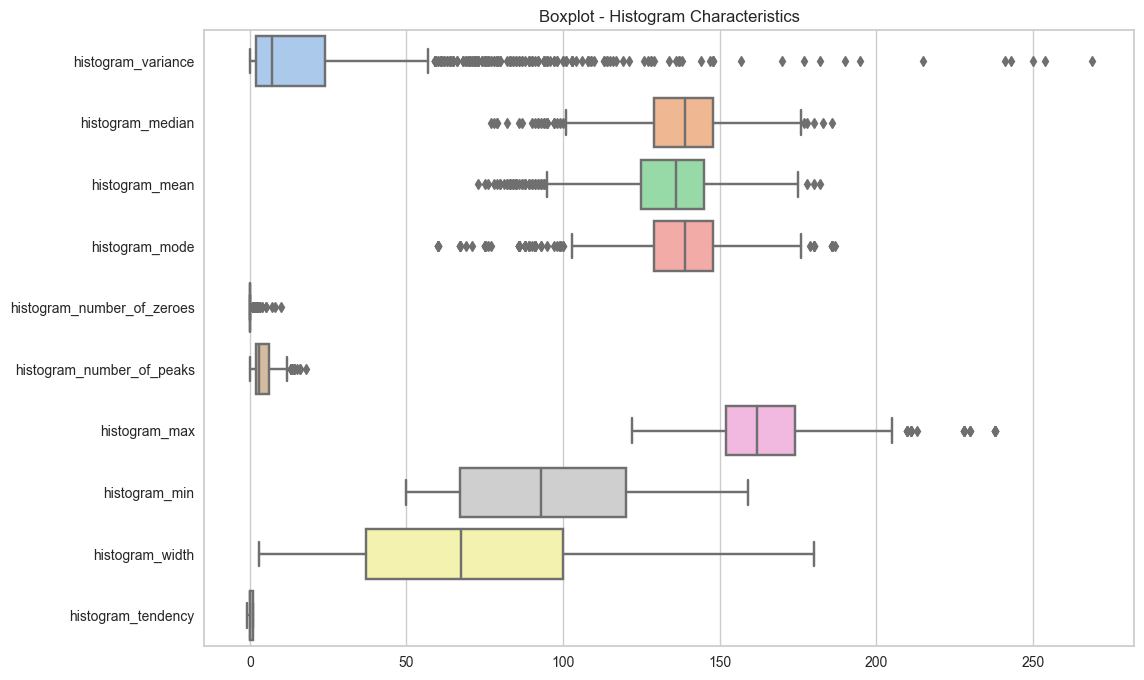

In [168]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_palette("pastel")
sns.boxplot(df[['histogram_variance', 'histogram_median', 'histogram_mean', 'histogram_mode',
                'histogram_number_of_zeroes', 'histogram_number_of_peaks', 'histogram_max',
                'histogram_min', 'histogram_width', 'histogram_tendency']], orient="h", ax = ax);
ax.set_title("Boxplot - Histogram Characteristics");

In [169]:
df[['histogram_variance', 'histogram_median', 'histogram_mean', 'histogram_mode',
                'histogram_number_of_zeroes', 'histogram_number_of_peaks', 'histogram_max',
                'histogram_min', 'histogram_width', 'histogram_tendency']].describe()

,histogram_variance,histogram_median,histogram_mean,histogram_mode,histogram_number_of_zeroes,histogram_number_of_peaks,histogram_max,histogram_min,histogram_width,histogram_tendency
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,18.808090,138.090310,134.610536,137.452023,0.323612,4.068203,164.025400,93.579492,70.445908,0.320320
std,28.977636,14.466589,15.593596,16.381289,0.706059,2.949386,17.944183,29.560212,38.955693,0.610829
min,0.000000,77.000000,73.000000,60.000000,0.000000,0.000000,122.000000,50.000000,3.000000,-1.000000
25%,2.000000,129.000000,125.000000,129.000000,0.000000,2.000000,152.000000,67.000000,37.000000,0.000000
50%,7.000000,139.000000,136.000000,139.000000,0.000000,3.000000,162.000000,93.000000,67.500000,0.000000
75%,24.000000,148.000000,145.000000,148.000000,0.000000,6.000000,174.000000,120.000000,100.000000,1.000000
max,269.000000,186.000000,182.000000,187.000000,10.000000,18.000000,238.000000,159.000000,180.000000,1.000000


Pode-se observar a presença de outliers no `histogram_variance`, que consta com um valor máximo discrepante da média e mediana, indicando uma alta variância do histograma em algumas instâncias. Os demais valores se mantém de forma mais estável.
Irei plotar o gráfico de correlação para ver se podemos tirar mais alguns *insights* deste grupo.

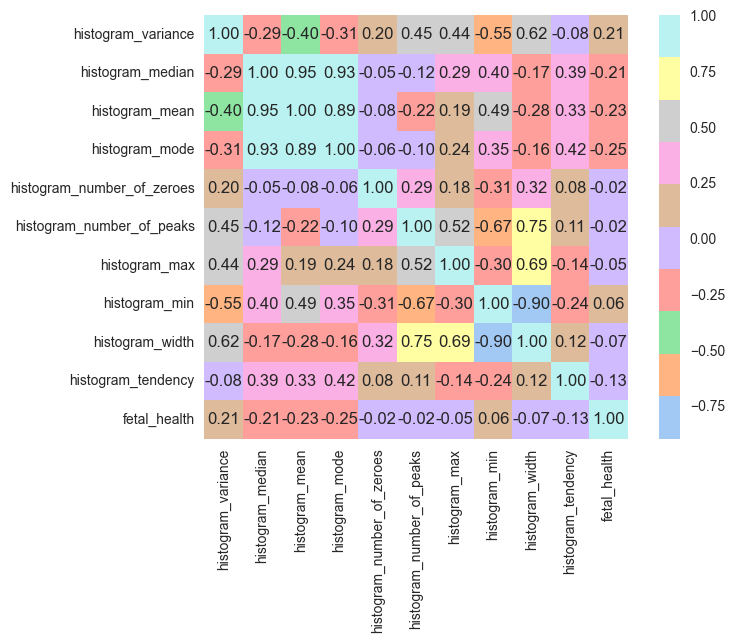

In [170]:
corr_df = df[['histogram_variance', 'histogram_median', 'histogram_mean', 'histogram_mode',
                'histogram_number_of_zeroes', 'histogram_number_of_peaks', 'histogram_max',
                'histogram_min', 'histogram_width', 'histogram_tendency', 'fetal_health']].corr(method='pearson')
sns.heatmap(corr_df, fmt='.2f',square = True, linecolor = 'white', annot = True, cmap = sns.color_palette("pastel"));

Pode-se observar que a variável com maior nível de correlação com a classe alvo, `fetal_health` é a `histogram_variance`. A variação no histograma pode ser uma característica importante para determinar a saúde do feto. As demais variáveis obtiveram correlação baixa ou negativa.

#### Group 2: Long and Short Term Variability

O grupo 2 representa as medidas de variabilidade do sinal cardiotocográfico fetal, tanto de longo quanto de curto prazo. Este grupo inclui as seguintes variáveis:

* mean_value_of_long_term_variability: a média da variabilidade de longo prazo, que é uma medida da variação da frequência cardíaca fetal ao longo do tempo.
* percentage_of_time_with_abnormal_long_term_variability: a porcentagem de tempo em que a variabilidade de longo prazo é anormal, o que pode ser um indicador de problemas de saúde fetal.
* mean_value_of_short_term_variability: a média da variabilidade de curto prazo, que é uma medida da variação da frequência cardíaca fetal em janelas de tempo mais curtas.
* abnormal_short_term_variability:  porcentagem de tempo com variabilidade anormal de curto prazo da FCF.

Essas medidas de variabilidade são importantes indicadores da saúde fetal, pois podem indicar problemas com o sistema nervoso autônomo do feto e a capacidade de adaptação a estresses. Por exemplo, uma baixa variabilidade de longo prazo ou uma alta porcentagem de tempo com variabilidade anormal podem indicar sofrimento fetal. Já a variabilidade de curto prazo é importante para avaliar a resposta fetal a estímulos externos, como contrações uterinas.

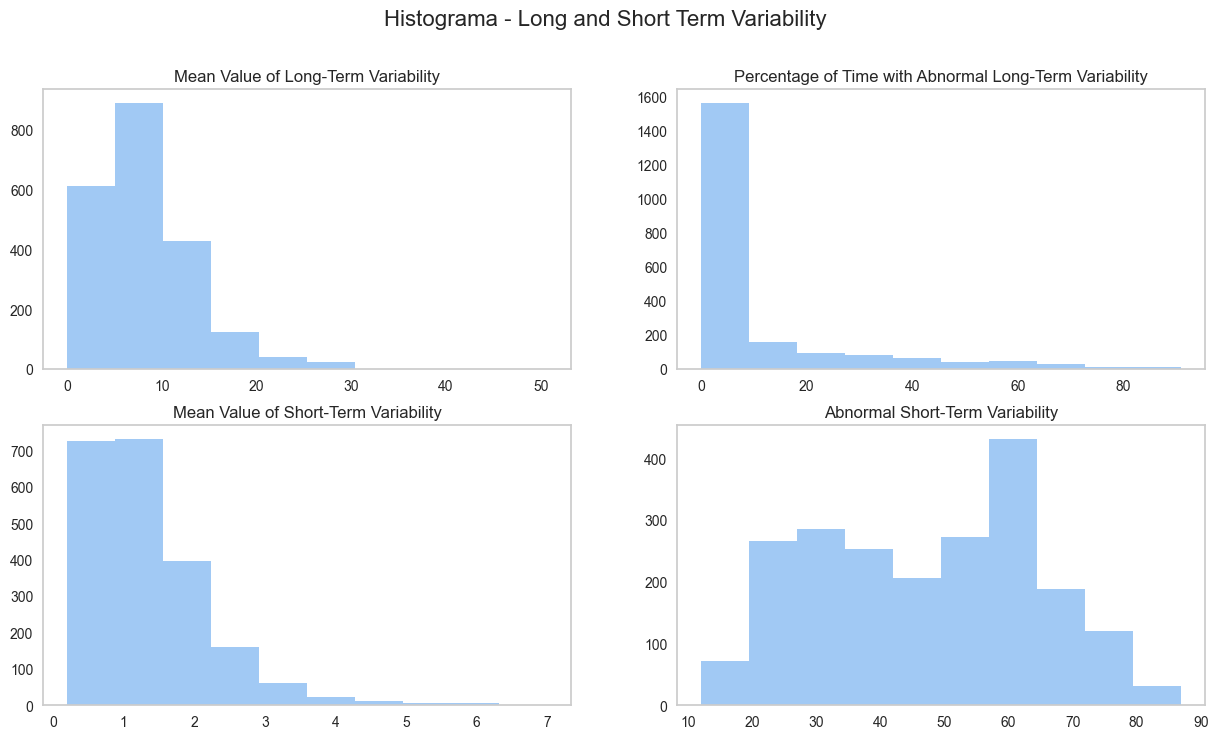

In [171]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

df.mean_value_of_long_term_variability.hist(ax=ax[0, 0])
ax[0, 0].set_title('Mean Value of Long-Term Variability')

df.percentage_of_time_with_abnormal_long_term_variability.hist(ax=ax[0, 1])
ax[0, 1].set_title('Percentage of Time with Abnormal Long-Term Variability')

df.mean_value_of_short_term_variability.hist(ax=ax[1, 0])
ax[1, 0].set_title('Mean Value of Short-Term Variability')

df.abnormal_short_term_variability.hist(ax=ax[1, 1])
ax[1, 1].set_title('Abnormal Short-Term Variability');

fig.suptitle('Histograma - Long and Short Term Variability', fontsize=16)


for i in range(2):
    for j in range(2):
        ax[i, j].grid(False)


Com base nos histogramas acima dispostos foi possível observar que:
* A média da variação da frequência cardíaca fetal ao longo do tempo tem maior frequência em até 10ms.
* A porcentagem de tempo em que a variabilidade de longo prazo é anormal tem maior frequênia em até 10%.
* A a média da variabilidade de curto prazo tem maior frequência em até 3ms.
* A porcentagem de tempo com variabilidade anormal de curto prazo tem maior frequência em 60%.

Irei plotar um gráfico de correlação com as variáveis descritas mais a variável alvo `fetal_health`.

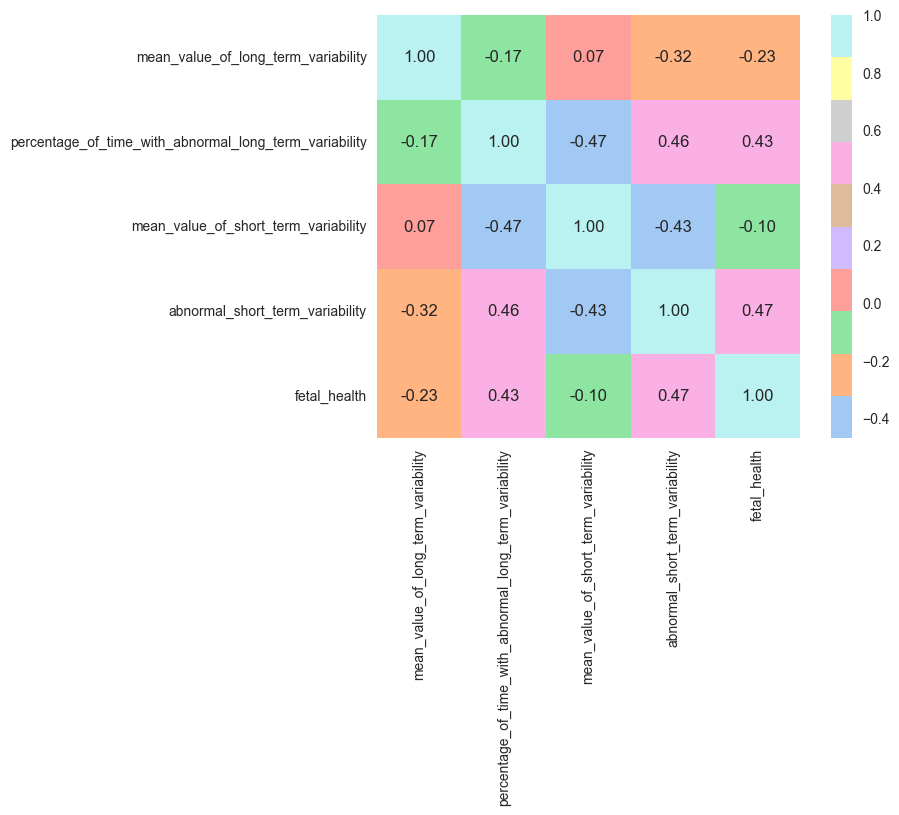

In [172]:
corr_df = df[['mean_value_of_long_term_variability', 'percentage_of_time_with_abnormal_long_term_variability',
              'mean_value_of_short_term_variability', 'abnormal_short_term_variability', 'fetal_health']].corr(method = 'pearson');
sns.heatmap(corr_df, fmt='.2f',square = True, linecolor = 'white', annot = True, cmap = sns.color_palette("pastel"));

Observando o gráfico pode-se notar que as variáveis `abnormal_short_term_variability` e `percentage_of_time_with_abnormal_long_term_variability` obtêm maior correlação com a variável alvo `fetal_health` de 0.47 e 0.43 respectivamente. 

#### Group 3: Decelerations and Contractions

O grupo 3 representa as medidas de desaceleração e contração uterina no sinal cardiotocográfico fetal. Especificamente, este grupo inclui as seguintes variáveis:

* prolongued_decelerations: o número de desacelerações prolongadas do batimento cardíaco fetal, que são quedas acentuadas da frequência cardíaca fetal com duração superior a 2 minutos.
* severe_decelerations: o número de desacelerações graves do batimento cardíaco fetal, que são quedas acentuadas da frequência cardíaca fetal com duração superior a 3 minutos e abaixo de 70 bpm.
* light_decelerations: o número de desacelerações leves do batimento cardíaco fetal, que são quedas temporárias da frequência cardíaca fetal com duração inferior a 30 segundos.
* uterine_contractions: o número de contrações uterinas por período de tempo.

Essas medidas são importantes para avaliar a resposta fetal a estímulos externos, como as contrações uterinas, e também para identificar problemas de saúde fetal, como sofrimento fetal, que podem ser indicados por desacelerações prolongadas ou graves. As contrações uterinas também são importantes para avaliar o trabalho de parto e podem afetar a saúde fetal durante o parto.

A fim de analisar tais variáveis irei exibir as informações estatísticas e um gráfico de correlação.

In [173]:
df[['prolongued_decelerations', 'severe_decelerations', 'light_decelerations', 'uterine_contractions']].describe().round(2)

,prolongued_decelerations,severe_decelerations,light_decelerations,uterine_contractions
count,2126.0,2126.0,2126.00,2126.00
mean,0.0,0.0,0.00,0.00
std,0.0,0.0,0.00,0.00
min,0.0,0.0,0.00,0.00
25%,0.0,0.0,0.00,0.00
50%,0.0,0.0,0.00,0.00
75%,0.0,0.0,0.00,0.01
max,0.0,0.0,0.02,0.02


Observando a descrição estatística, os dados se mostram congruentes e sem a presença de outliers. Vejamos agora o gráfico de correlação.

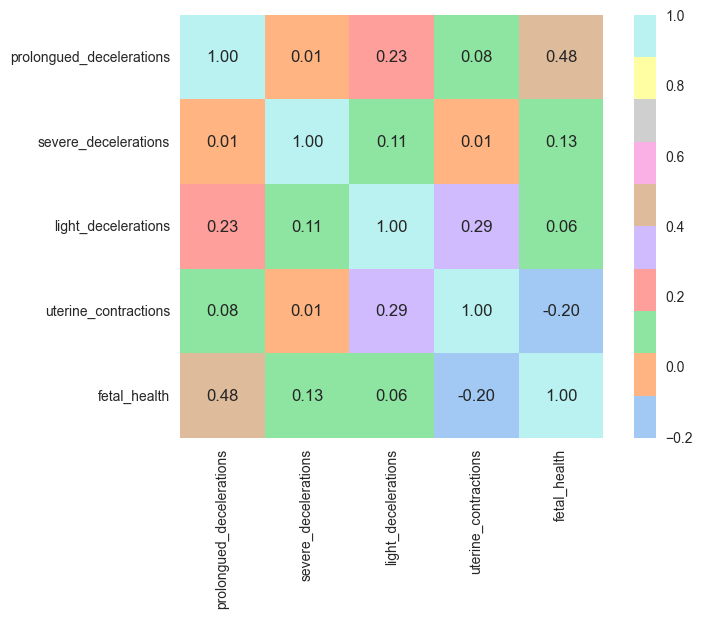

In [174]:
corr_df = df[['prolongued_decelerations', 'severe_decelerations', 
              'light_decelerations', 'uterine_contractions', 'fetal_health']].corr(method = 'pearson')
sns.heatmap(corr_df, fmt='.2f',square = True, linecolor = 'white', annot = True, cmap = sns.color_palette("pastel"));

Com o gráfico de correlação pode-se perceber que as variáveis mais significantes foram `prolongued_decelerations` e `severe_decelerations` em relação ao `fetal_health`. Há um padrão que features que demonstram anomalias tenham maior correlação com a classe alvo.

#### Group 4: Fetal Movement and Accelerations

O grupo 4 representa as medidas de movimento fetal e acelerações do batimento cardíaco fetal. Este grupo inclui as seguintes variáveis:

* fetal_movement: o número de movimentos fetais por período de tempo.
* accelerations: o número de acelerações do batimento cardíaco fetal por período de tempo.

Essas medidas são importantes para avaliar a resposta fetal a estímulos externos, como os movimentos fetais, e também para identificar a saúde fetal. As acelerações do batimento cardíaco fetal são um indicador de bem-estar fetal e podem indicar a capacidade do feto de se adaptar a estímulos externos. As acelerações geralmente são definidas como aumentos rápidos e transitórios na frequência cardíaca fetal de pelo menos 15 batimentos por minuto por pelo menos 15 segundos. Movimentos fetais regulares também são um indicador de bem-estar fetal e podem ser afetados por fatores como a idade gestacional e a posição fetal.

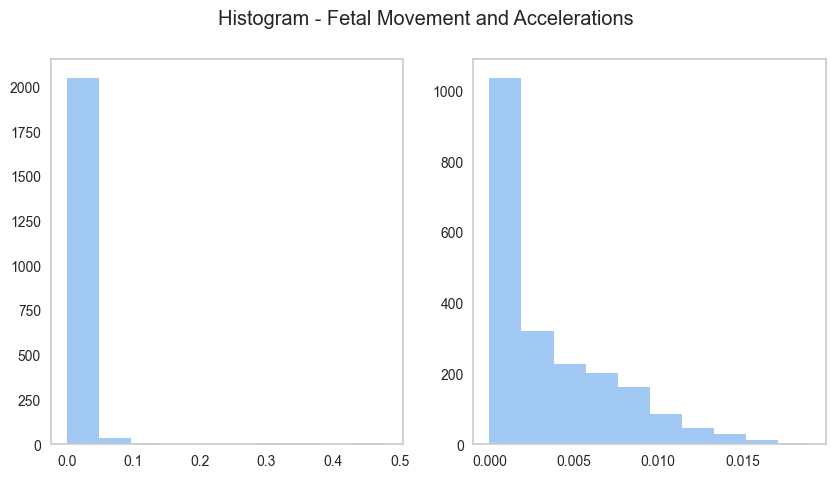

In [175]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.set_palette("pastel")
df.fetal_movement.hist(ax = ax[0])
df.accelerations.hist(ax = ax[1])
ax[0].grid(False)
ax[1].grid(False)
fig.suptitle("Histogram - Fetal Movement and Accelerations");

Com o histograma pode-se observar que o número de movimentos fetais têm maior frequência até 0.05, já o número de acelerações do batimento cardíaco fetal até 0.005.

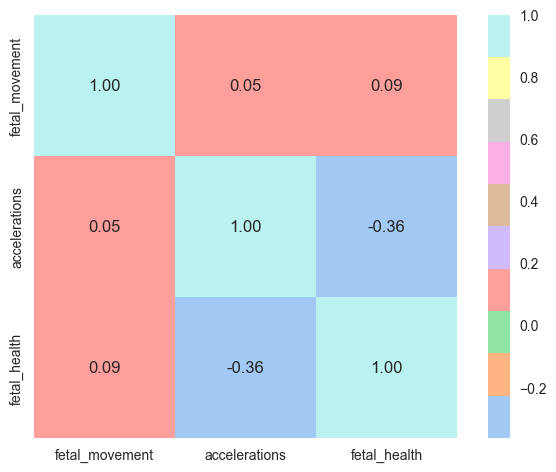

In [176]:
corr_df = df[['fetal_movement', 'accelerations', 'fetal_health']].corr(method = 'pearson')
sns.heatmap(corr_df, fmt='.2f',square = True, linecolor = 'white', annot = True, cmap = sns.color_palette("pastel"));

O gráfico de correlação não demonstrou correlações significativas entre as variáveis e a classe alvo.

#### Group 5: Fetal Health (Response Variable)

O grupo 5 representa a variável de resposta, que é a variável que você está interessado em prever ou explicar com base nas outras variáveis do conjunto de dados. A variável de resposta é `fetal_health`, que é uma variável categórica que indica o resultado do exame do estado de saúde fetal. Essa variável pode ter três possíveis valores:

* 1: quando o feto está saudável.
* 2: quando o feto está suspeito de estar sofrendo.
* 3: quando o feto está em um estado patológico, o que significa que há sinais de sofrimento fetal.

Irei verificar o **balanceamento** da classe alvo.

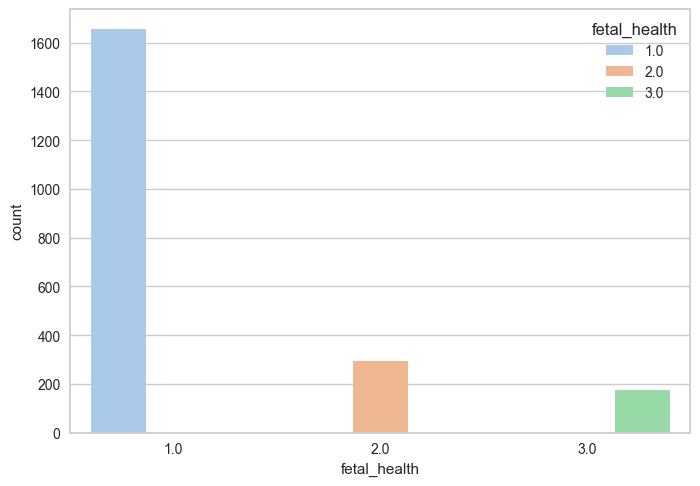

In [177]:
# gráfico de balanceamento
sns.countplot(x=df.fetal_health, hue=df.fetal_health);

In [178]:
# proporção entre as classes
round(df.fetal_health.value_counts()/df.shape[0] * 100,2)

1.0    77.85
2.0    13.88
3.0     8.28
Name: fetal_health, dtype: float64

Pode-se observar que o conjunto está **desbalanceado** haja vista que 77% do conjunto de dados pertence à classe 1 (saudável), 13% à classe 2 (suspeito) e apenas 8% à classe 3 (estado patológico). Portanto, será **necessário realizar um balanceamento** antes de treinar o classificador.

## Balanceamento de Dados

### Amostragem

Um dataset que possua mais de 50% das entradas em uma classe já é considerado desbalanceado. A maioria dos algoritmos de aprendizado de máquina funcionam bem com conjuntos de dados equilibrados, uma vez que eles buscam otimizar a precisão geral da classificação ou medidas relacionadas. Para dados **desbalanceados**, os limites de decisões estabelecidos por padrão nos algoritmos tendem a ser **enviesados em torno da classe majoritária**. Portanto a **classe minoritária tende a ser classificada incorretamente.**

Uma maneira de corrigir o problema é por meio de **amostragem** que contém duas técnicas. A técnica de **over-sampling**, consiste em **gerar novos exemplos para a classe minoritária**, de forma a aumentar sua representatividade no conjunto de dados. Já o **under-sampling** **remove** instâncias da **classe majoritária**.

Esses métodos de amostragem, no entanto, possuem **diversas desvantagens** (Weiss, 2004). O under-sampling descarta a exemplos da classe majoritária potencialmente úteis e pode, portanto, degradar o desempenho do classificador. Como o over-sampling introduz casos de treinamento adicionais, pode aumentar o tempo necessário para construir um classificador, e levar a casos de overfitting.

Como há **poucas instâncias** no nosso conjunto de testes, para esse estudo, optarei por utilizar o **over-sampling**, mas antes, dividirei o conjunto de dados entre **treino** e **teste**.




In [179]:
df_new = df.copy()

# separar variáveis entre X e y
X = df_new.drop('fetal_health', axis=1)
y = df_new['fetal_health'] # variável alvo

# dividir o dataset entre treino e validação
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, test_size = 0.15)

### SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) é uma técnica de **over-sampling** amplamente utilizada em problemas de classificação em que a classe minoritária é significativamente menor do que a classe majoritária. Essa técnica é útil porque muitos algoritmos de aprendizado de máquina são sensíveis ao desbalanceamento de classes e tendem a ter um desempenho pior quando a classe minoritária é sub-representada. A técnica funciona selecionando um exemplo da classe minoritária e encontrando os seus k vizinhos mais próximos. Em seguida, ela **cria novos exemplos sintéticos** interpolando aleatoriamente os atributos dos exemplos selecionados e adicionando-os ao conjunto de dados.

In [180]:
# Criando uma instância do SMOTE
smote = SMOTE()

# Balanceando os dados
X_resampled, y_resampled= smote.fit_resample(X_train, y_train)

Uma instância do **smote** fora criado, e a função fit_resample realizou o balanceamento no conjunto de treino. A seguir a diferença de valores.

In [181]:
# Visualizando o tamanho do conjunto de treinamento
print("Tamanho do y_train:", np.shape(y_train))

# Visualizando o tamanho do conjunto balanceado
print("Tamanho do y_resampled:", np.shape(y_resampled))

Tamanho do y_train: (1807,)
Tamanho do y_resampled: (4221,)


Pode-se perceber que as instâncias aumentaram significativamente. Agora iremos verificar o balanceamento das classes.

In [182]:
# ver o balanceamento das classes
print(pd.Series(y_resampled).value_counts())

1.0    1407
3.0    1407
2.0    1407
Name: fetal_health, dtype: int64


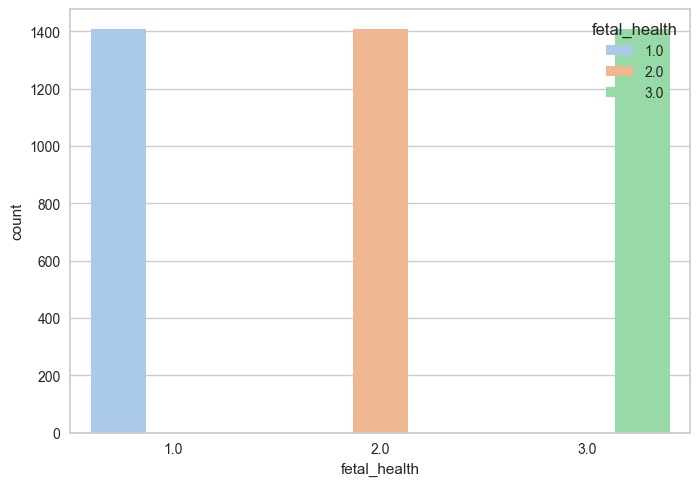

In [183]:
sns.countplot(x=y_resampled, hue=y_resampled);

A classe está balanceada com os três valores de maneira equalitária.

## Auto-Machine Learning

AutoML (**Aprendizado de Máquina Automático**) é um conjunto de técnicas e ferramentas que **automatizam o processo de desenvolvimento de modelos de Machine Learning**. O **PyCaret** é uma **biblioteca de AutoML** de código aberto para Python que permite criar, treinar e ajustar modelos de aprendizado de máquina de forma rápida e fácil. Para esse projeto, **utilizaremos a biblioteca**, a fim de permitir a verificação de hipóteses de maneira mais rápida.

Abaixo será criado um pipeline para o modelo de classificação, onde os dados de treino serão passados e a variável alvo (`fetal_health`) é informada.

In [184]:
# executando a função setup() do PyCaret
clf = setup(data=X_resampled,
            target=y_resampled,
            normalize=True,
            transformation=True,
            remove_multicollinearity=True,
            multicollinearity_threshold=0.95,
            log_experiment=True,
            experiment_name='fetal_health')

,Description,Value
0,Session id,5380
1,Target,fetal_health
2,Target type,Multiclass
3,Target mapping,"1.0: 0, 2.0: 1, 3.0: 2"
4,Original data shape,"(4221, 22)"
5,Transformed data shape,"(4221, 21)"
6,Transformed train set shape,"(2954, 21)"
7,Transformed test set shape,"(1267, 21)"
8,Numeric features,21
9,Preprocess,True


Abaixo será treinado vários modelos de machine learning com os dados de treinamento e comparar suas métricas de desempenho. O argumento sort='F1' é usado para classificar os modelos com base em sua métrica F1, que é uma medida harmônica que irá considerar as classes com pesos iguais. Optei por utilizá-la, pois nesse caso precision e recall são importantes.

In [185]:
# best = compare_models()
best = compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9766,0.9986,0.9766,0.9769,0.9766,0.9650,0.9651,0.3710
et,Extra Trees Classifier,0.9756,0.9975,0.9756,0.9758,0.9756,0.9634,0.9636,0.3470
xgboost,Extreme Gradient Boosting,0.9743,0.9983,0.9743,0.9745,0.9743,0.9614,0.9615,0.4290
rf,Random Forest Classifier,0.9709,0.9981,0.9709,0.9711,0.9709,0.9563,0.9564,0.3530
gbc,Gradient Boosting Classifier,0.9628,0.9962,0.9628,0.9630,0.9628,0.9441,0.9442,0.6690
dt,Decision Tree Classifier,0.9455,0.9591,0.9455,0.9458,0.9455,0.9182,0.9184,0.2510
knn,K Neighbors Classifier,0.9425,0.9878,0.9425,0.9448,0.9424,0.9137,0.9148,0.2580
ada,Ada Boost Classifier,0.9106,0.9497,0.9106,0.9117,0.9109,0.8659,0.8662,0.2880
lr,Logistic Regression,0.8758,0.9671,0.8758,0.8778,0.8761,0.8136,0.8143,0.2790
svm,SVM - Linear Kernel,0.8544,0.0000,0.8544,0.8605,0.8546,0.7816,0.7844,0.2450


A tabela de score impressa acima destaca os modelos com melhores resultados nas médias das métricas de avaliação para comparação. Todos os modelos foram comparados com uma validação cruzada com 10 folds.

O melhor modelo de acordo com a métrica escolhida foi o **Light Gradient Boosting Machine**.

In [186]:
# verificando o melhor modelo
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5380, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### Light Gradient Boosting Machine	

O Light Gradient Boosting Machine (LightGBM) é um algoritmo de aprendizado de máquina baseado em árvores de decisão, que foi desenvolvido pela Microsoft. O LightGBM é uma implementação eficiente de gradient boosting que utiliza técnicas de pré-processamento de dados para melhorar a velocidade e a precisão do modelo. Instanciaremos o modelo com esse algoritmo.

In [187]:
# instância do modelo
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9865,0.9990,0.9865,0.9866,0.9865,0.9797,0.9798
1,0.9797,0.9991,0.9797,0.9797,0.9797,0.9696,0.9696
2,0.9662,0.9989,0.9662,0.9663,0.9662,0.9493,0.9494
3,0.9865,0.9993,0.9865,0.9870,0.9865,0.9797,0.9799
4,0.9593,0.9952,0.9593,0.9595,0.9594,0.9390,0.9390
5,0.9593,0.9962,0.9593,0.9593,0.9593,0.9390,0.9390
6,0.9695,0.9995,0.9695,0.9704,0.9696,0.9542,0.9546
7,0.9864,0.9995,0.9864,0.9867,0.9865,0.9797,0.9798
8,0.9966,0.9997,0.9966,0.9966,0.9966,0.9949,0.9949


In [188]:
# verificando os parâmetros
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5380, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### Ajuste dos hiperparâmetros

A função tune_model() está sendo usada para ajustar os hiperparâmetros do modelo LightGBM com o objetivo de maximizar a pontuação F1. A pontuação F1 é uma medida que combina precisão e recall em uma única métrica.

In [189]:
# tuning de parâmetros
tuned_lightgbm = tune_model(lightgbm, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9730,0.9969,0.9730,0.9734,0.9731,0.9595,0.9596
1,0.9662,0.9971,0.9662,0.9664,0.9663,0.9493,0.9493
2,0.9696,0.9960,0.9696,0.9699,0.9696,0.9544,0.9545
3,0.9595,0.9985,0.9595,0.9603,0.9593,0.9392,0.9397
4,0.9593,0.9958,0.9593,0.9598,0.9594,0.9390,0.9391
5,0.9627,0.9952,0.9627,0.9629,0.9628,0.9441,0.9441
6,0.9593,0.9977,0.9593,0.9595,0.9594,0.9390,0.9390
7,0.9593,0.9968,0.9593,0.9600,0.9594,0.9390,0.9392
8,0.9864,0.9992,0.9864,0.9866,0.9865,0.9797,0.9797


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [190]:
# veriificando os parâmetros
print(tuned_lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5380, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


Podemos observar que as métricas manteram-se semelhantes, mantendo-se uma boa performance.

### Avaliando os modelos

Abaixo será plotado a matriz de confusão para os dados de teste separados pelo próprio pycaret.

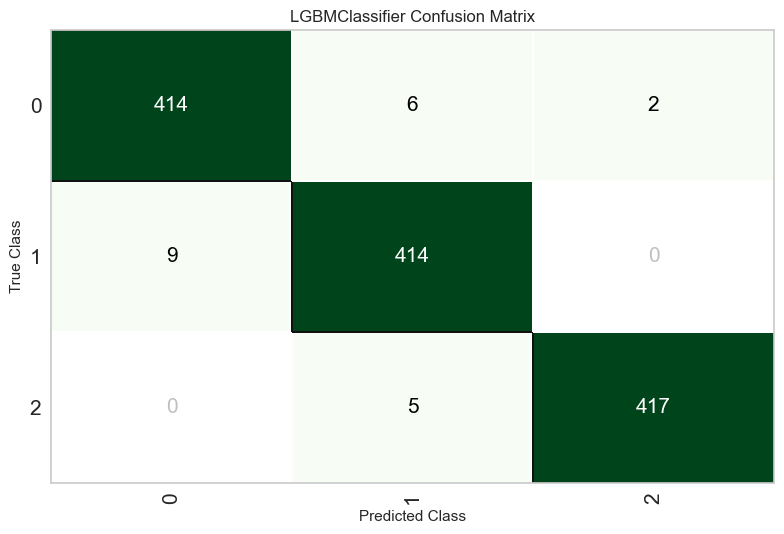

In [191]:
# plotando matriz de confusão
plot_model(tuned_lightgbm, plot='confusion_matrix')

Podemos observar que o resultado foi bastante satisfatório. O modelo acertou a maioria dos dados na classe correta. Iremos verificar agora as features mais importantes na construção do classificador.

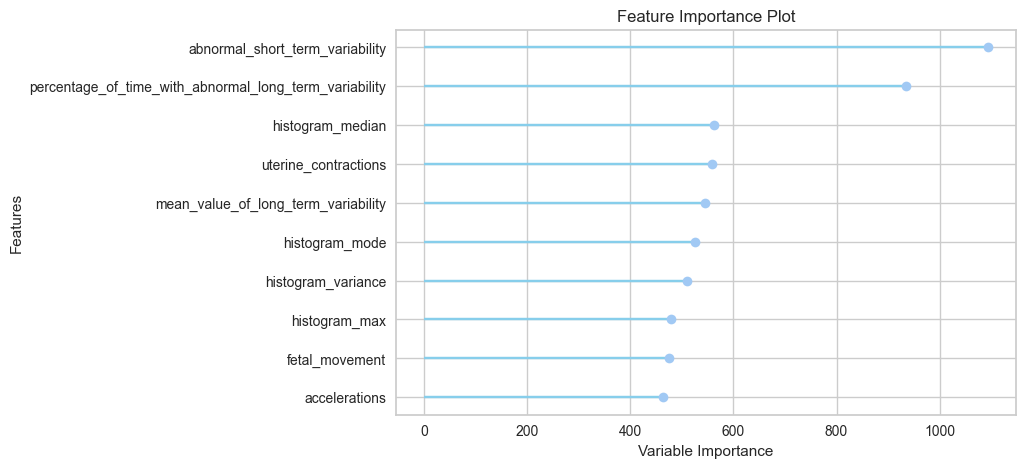

In [192]:
plot_model(tuned_lightgbm, plot='feature')

As três features mais importantes para o classificador foram:
    
* abnormal_short_term_variability;
* percentage_of_time_with_abnormal_long_term_variability, e
* histogram_median.

Observamos uma correlação alta entre as duas primeiras features e a variável alvo durante a análise exploratória.
Plotaremos também a curva ROC para as classes.

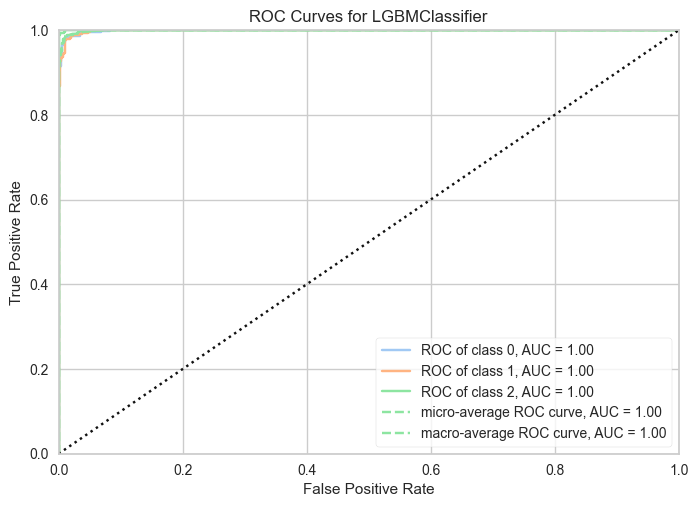

In [193]:
plot_model(tuned_lightgbm, plot='auc')

A curva ROC é um gráfico que representa a taxa de verdadeiros positivos (TPR) em relação à taxa de falsos positivos (FPR) para diferentes valores de limiar de decisão. A área sob a curva ROC é um valor entre 0 e 1, sendo que um valor mais próximo de 1 indica um modelo com melhor capacidade de distinguir entre as classes.

O AUC para todas as classes foi 1, isso indica que o modelo tem uma boa capacidade de distinguir entre as três classes.

### Fazendo Previsões

Antes de finalizar o modelo, é recomendável que se faça uma checagem final, fazendo previsões no conjunto de teste e revisando as métricas de avaliação.

O objetivo aqui é verificar a diferença de performance entre os resultados da validação cruzada e dos dados novos.

In [194]:
# fazendo previsões
predict_model(tuned_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9826,0.9991,0.9834,0.9847,0.9840,0.9740,0.9740


Obtivemos boas métricas, o modelo possui uma acurácia de 0.98, o que define sua capacidade geral de acertos. De maneira semelhante, o F1, precision e recall mantêm-se altos, acima de 98%.

### Finalizando o Modelo

Finalizar o modelo é o último passo do nosso projeto. A função `finalize_model()` dá o fit no modelo, incluindo o conjunto de teste separado dentro do PyCaret anteriormente (30% nesse caso).

In [195]:
# finalizando o modelo
final_lightgbm = finalize_model(tuned_lightgbm)

In [196]:
# verificando os parâmetros
print(final_lightgbm)

Pipeline(memory=FastMemory(location=C:\Users\danie\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['baseline value', 'accelerations',
                                             'fetal_movement',
                                             'uterine_contractions',
                                             'light_decelerations',
                                             'sever...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                

### Prevendo em Dados Novos

A função `predict_model()` também é usada para prever em datasets nunca vistos antes. A única diferença é que para isso passaremos o parâmetro data.

Dessa forma, passaremos como data os dados que ainda não foram vistos pelo modelo, separados anteriormente, no começo do projeto.

Esse conjunto contém 15% do conjunto de dados original, que estão desbalanceados. Essa porção nunca foi exposta ao PyCaret, e é perfeita para simular novos dados reais que serão recebidos pelo modelo em produção.

In [197]:
# proporção dos dados de teste
round(y_test.value_counts()/y_test.shape[0] * 100,2)

1.0    77.74
2.0    13.79
3.0     8.46
Name: fetal_health, dtype: float64

In [198]:
# usando a função predict_model() para fazer previsões no conjunto de teste
test_preds = predict_model(final_lightgbm, data=X_test)

In [199]:
test_preds

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,prediction_label,prediction_score
860,142.0,0.001,0.000,0.004,0.000,0.0,0.0,39.0,0.9,0.0,...,159.0,1.0,0.0,151.0,147.0,149.0,4.0,1.0,1.0,0.9996
172,119.0,0.001,0.000,0.004,0.001,0.0,0.0,29.0,1.3,2.0,...,166.0,3.0,1.0,121.0,121.0,123.0,4.0,0.0,1.0,0.9999
1219,135.0,0.000,0.000,0.005,0.003,0.0,0.0,51.0,0.6,2.0,...,146.0,1.0,0.0,138.0,134.0,137.0,3.0,1.0,1.0,0.9999
2006,125.0,0.004,0.001,0.006,0.009,0.0,0.0,61.0,1.2,0.0,...,164.0,5.0,1.0,110.0,118.0,119.0,30.0,0.0,1.0,1.0000
1899,139.0,0.009,0.001,0.008,0.006,0.0,0.0,50.0,1.4,0.0,...,178.0,8.0,0.0,162.0,142.0,147.0,71.0,1.0,1.0,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,122.0,0.000,0.000,0.000,0.000,0.0,0.0,19.0,1.9,0.0,...,142.0,1.0,0.0,120.0,120.0,122.0,3.0,0.0,1.0,1.0000
1012,139.0,0.007,0.000,0.003,0.000,0.0,0.0,41.0,0.8,0.0,...,173.0,2.0,0.0,144.0,144.0,145.0,3.0,-1.0,1.0,1.0000
258,127.0,0.012,0.000,0.008,0.004,0.0,0.0,13.0,3.8,0.0,...,191.0,12.0,1.0,133.0,126.0,131.0,41.0,0.0,1.0,1.0000
1507,130.0,0.000,0.000,0.005,0.000,0.0,0.0,53.0,0.5,45.0,...,143.0,2.0,0.0,137.0,136.0,138.0,0.0,1.0,1.0,0.9850


Irei plotar um relatório de classificação e uma matriz de confusão a fim de analisar os resultados obtidos com o conjunto de teste.

In [200]:
# criando um relatório de classificação para avaliar o desempenho do modelo
print(classification_report(y_test, test_preds['prediction_label']))

              precision    recall  f1-score   support

         1.0       0.98      0.99      0.98       248
         2.0       0.93      0.86      0.89        44
         3.0       1.00      1.00      1.00        27

    accuracy                           0.97       319
   macro avg       0.97      0.95      0.96       319
weighted avg       0.97      0.97      0.97       319



O classificador obteve um ótimo desempenho haja vista que estava lidando com dados desconhecidos. 

A precisão (precision) mede a proporção de exemplos classificados como positivos que realmente são positivos. No caso da classe 1.0, a precisão é 0.98, o que significa que, de todos os exemplos classificados como 1.0, 98% são realmente da classe 1.0. Para a classe 2.0, a precisão é 0.93 e, para a classe 3.0, é 1, ou seja, todos os dados foram previstos corretamente.

O recall mede a proporção de exemplos positivos que foram corretamente identificados pelo modelo. Para a classe 1.0, o recall é 0.99, ou seja, o modelo identificou corretamente 98% dos exemplos da classe 1.0. Para a classe 2.0, o recall é 0.86 e, para a classe 3.0, é 1.

O F1-score é uma média harmônica entre a precisão e o recall e é uma medida útil quando se deseja levar em conta tanto a precisão quanto o recall. O F1-score para a classe 1.0 é 0.98, para a classe 2.0 é 0.89 e para a classe 3.0 é 1.

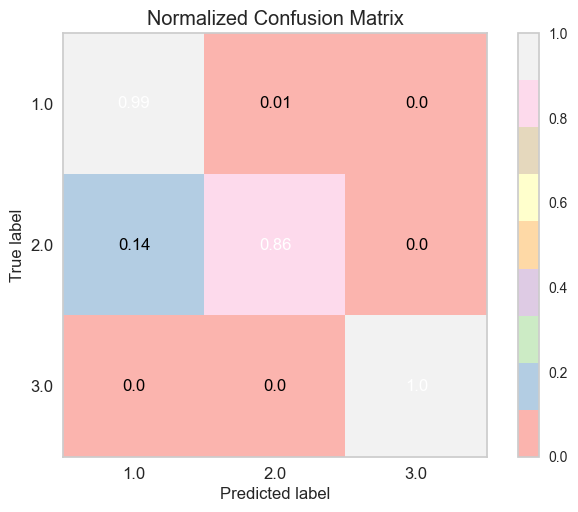

In [201]:
skplt.metrics.plot_confusion_matrix(y_test, test_preds['prediction_label'], normalize=True, cmap='Pastel1');

### Conclusão

Com base na **análise exploratória dos dados** e na **construção dos modelos de classificação**, podemos concluir que **é possível prever a saúde fetal com uma precisão relativamente alta usando técnicas de aprendizado de máquina**. Os resultados mostraram que o modelo **Light Gradient Boosting Machine** teve um **desempenho significativamente melhor** do que os outros modelos testados, com uma **acurácia **de cerca de 97%, bem como **recall, F1 e precision**. Nos dados de teste, as boas métricas se mantiveram com acurácia de 97%, e F1 de 98%, 89% e 100% para a classe 1, 2 e 3, respectivamente.

Também foi possível **identificar as variáveis mais importantes na predição da saúde fetal**, como a **variabilidade de curto prazo** e a **variabilidade de longo prazo da frequência cardíaca fetal**. Além disso, foi evidenciado que as características fetais obtidas através da cardiotocografia computadorizada são relevantes para a predição da saúde fetal, pois apresentam forte correlação com os resultados dos exames.

Por fim, esses resultados são importantes para a prática clínica, pois permitem que os profissionais de saúde identifiquem os fetos em risco e tomem medidas preventivas para garantir um parto seguro. Além disso, a metodologia empregada nesta análise pode ser adaptada para outras áreas da medicina, ajudando a desenvolver modelos de predição para outras doenças e condições de saúde.